<a href="https://colab.research.google.com/github/777Isa777/777Isa777/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


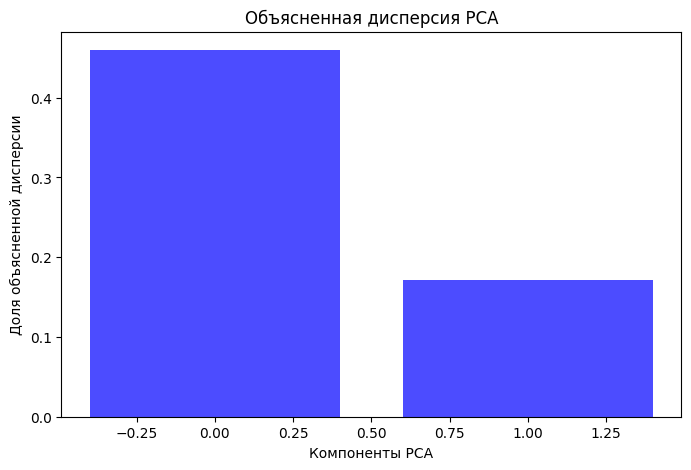

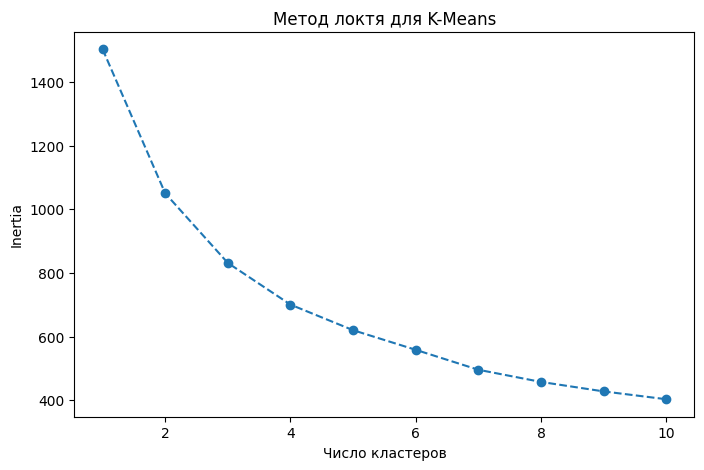

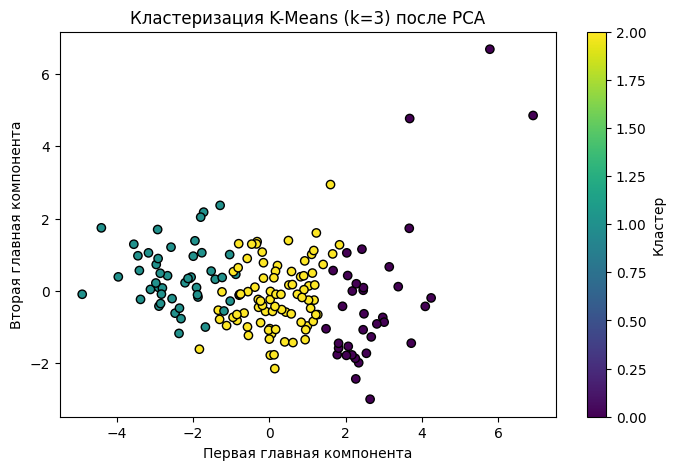

In [ ]:
df = pd.read_csv("Country-data.csv")

# Проверка данных
print(df.head())

# Удаление текстовых столбцов, если они есть (например, названия стран)
if df.select_dtypes(include=['object']).shape[1] > 0:
    df_numeric = df.select_dtypes(exclude=['object'])
else:
    df_numeric = df.copy()

# Стандартизация данных
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Применение PCA (уменьшаем до 2 компонент для визуализации)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Визуализация объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, color='b')
plt.xlabel('Компоненты PCA')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Объясненная дисперсия PCA')
plt.show()

# Применение K-Means (ищем оптимальное число кластеров методом "локтя")
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для K-Means')
plt.show()

# Выбираем оптимальное число кластеров (например, 3) и обучаем K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Визуализация кластеров
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title(f'Кластеризация K-Means (k={optimal_k}) после PCA')
plt.colorbar(label='Кластер')
plt.show()
